# EDA(탐색적 자료분석)



In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
result = pd.read_csv('Auction_result.csv')



In [ ]:
train #Hammer_price 가 예측할 

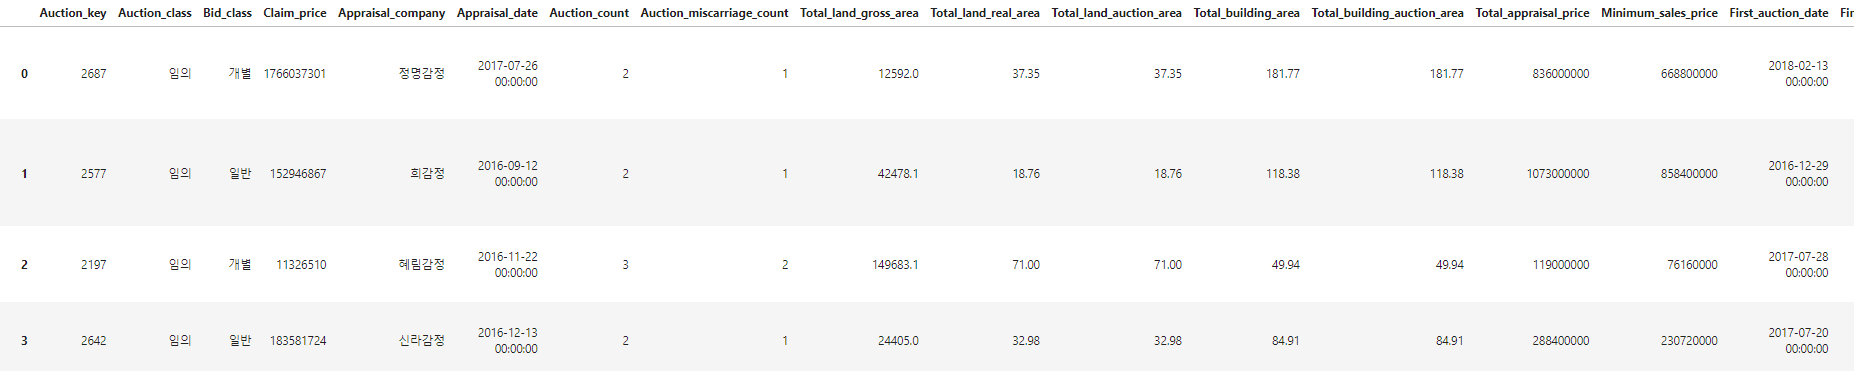

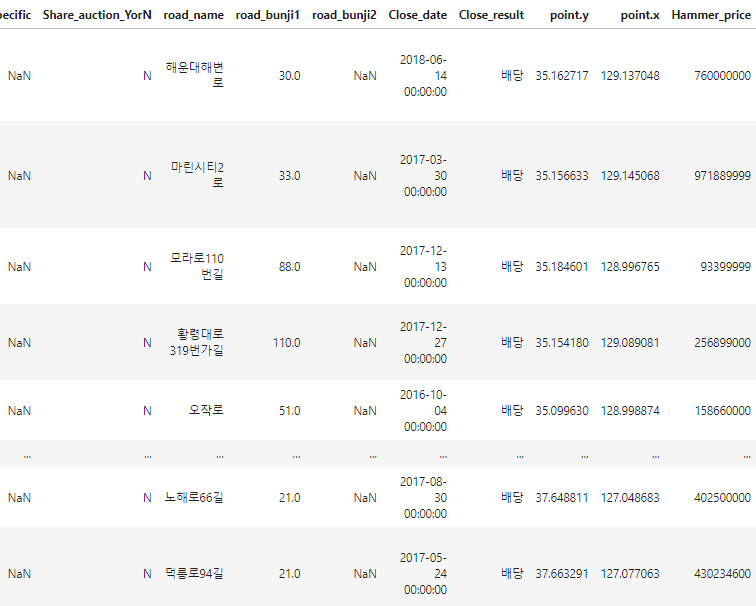

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6,6))

sns.histplot(data=train, x="Hammer_price", bins=100, ax = ax)
plt.show()

# 종속변수의 분포 확

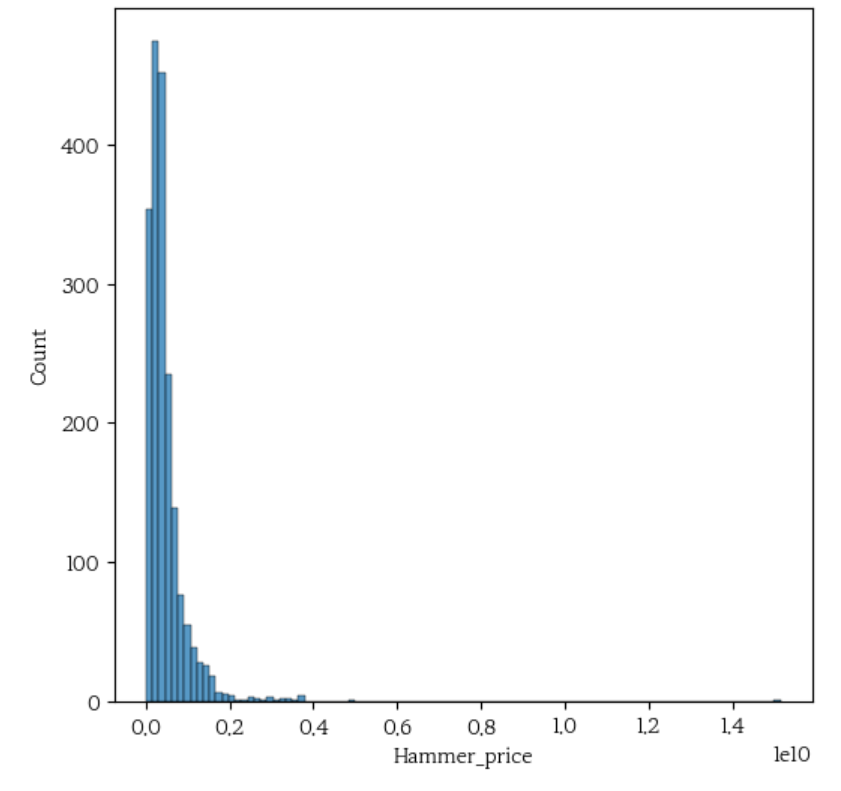

In [ ]:
## 낙찰가(Hammer_price) 와 Auction_count(총 경매횟수) 의 관계확
fig, ax = plt.subplots(figsize = (10,10))

x = train['Auction_count']
y = train['Hammer_price']

ax.set_xlabel('Auction_count')
ax.set_ylabel('Hammer_price')

ax.bar(x,y)
plt.show()

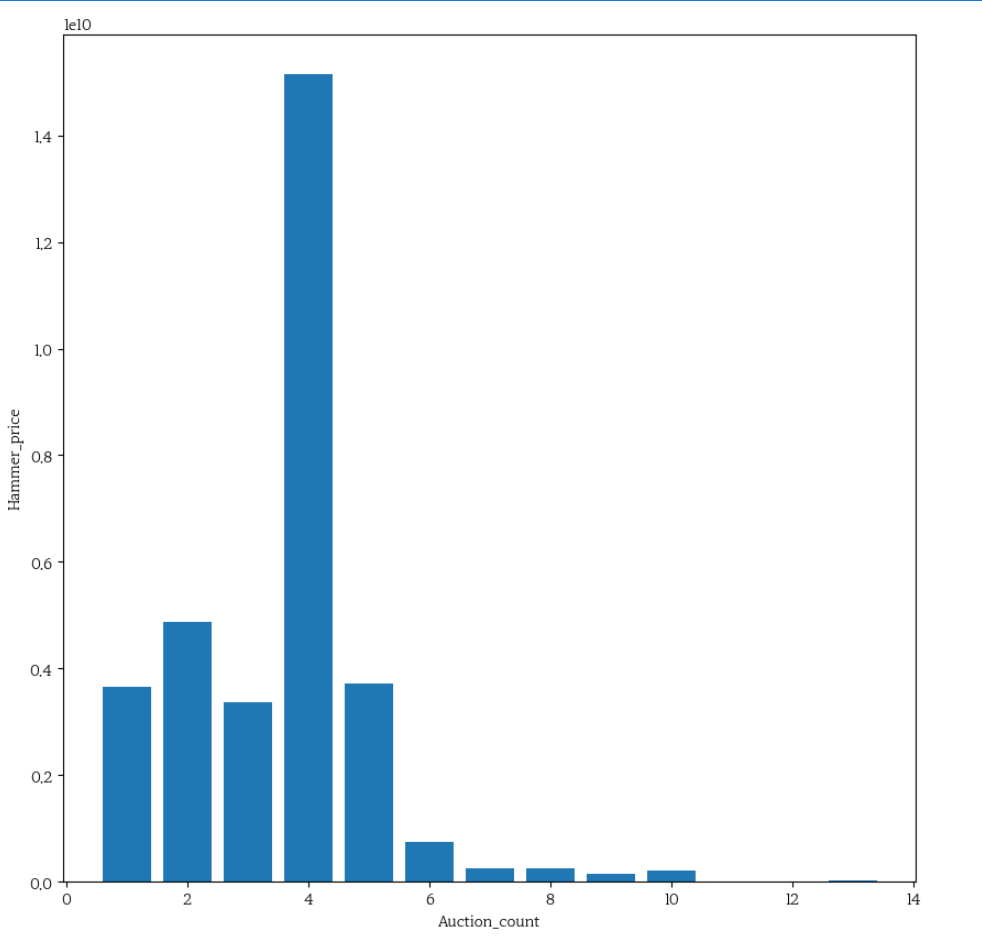

### Hammer_price 와 부산의 관계

In [ ]:
train_busan = train[train['addr_do'] == '부산']

fig, ax = plt.subplots(figsize = (10,5), dpi = 100)

x = train_busan[train_busan['Hammer_price']>700000000]['addr_si'].value_counts().index
y = train_busan[train_busan['Hammer_price']>700000000]['addr_si'].value_counts().values

ax.tick_params(axis = 'x', rotation=45)
ax.bar(x,y)
plt.show()

부산의 7억이상의 아파트
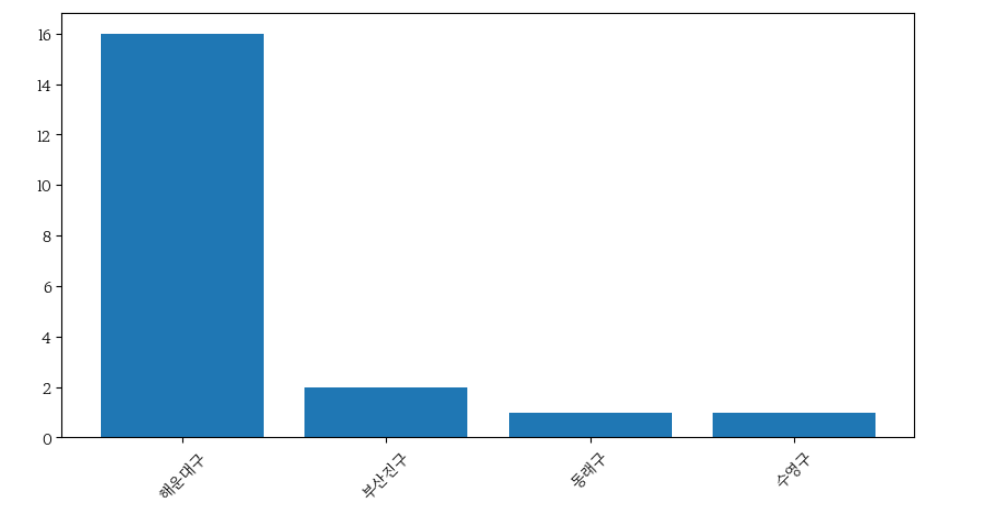

### Hammer_price 와 서울의 관계

In [ ]:

train_seoul = train[train['addr_do']=='서울']

fig, ax = plt.subplots(figsize = (10,5), dpi = 100)

x = train_seoul[train_seoul['Hammer_price']>3000000000]['addr_si'].value_counts().index
y = train_seoul[train_seoul['Hammer_price']>3000000000]['addr_si'].value_counts().values

ax.tick_params(axis = 'x', rotation=45)
ax.bar(x,y)
plt.show()

### 거래횟수와 가격의 관계

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))

x_seq = result[result['Auction_key']==3]['Auction_seq']
y_min_price= result[result['Auction_key']==3]['Minimum_sales_price']
y_price= result[result['Auction_key']==3]['Appraisal_price']

ax.set_xlabel('Auction_seq')
ax.set_ylabel('Price')

ax.plot(x_seq,y_min_price)
ax.plot(x_seq,y_price)
ax.legend(['Minimum_sales_price','Appraisal_price'])
plt.show()

거래가 많이 진행됐을수록 최소가격이 상승한다.
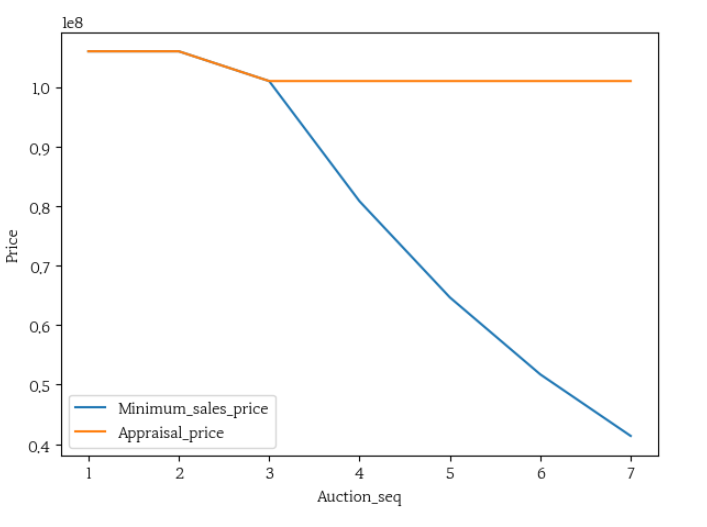

### Appraisal_price(감정가) & Minimum_sales_price(최저 매각 가격)의 관계

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

y_price_comparison = result['Appraisal_price']
y_minprice_comparison = result['Minimum_sales_price']

ax.set_xlabel('min_price_comparison')
ax.set_ylabel('price_comparisonice')

plt.xlim(0, 0.5e10)
plt.ylim(0, 0.8e10)

ax.scatter(y_minprice_comparison,y_price_comparison)
plt.show()

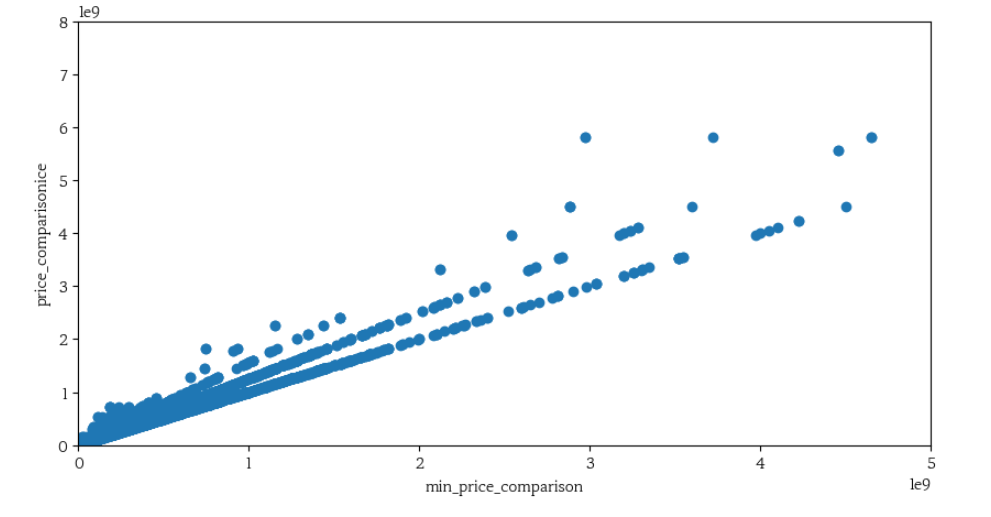

In [ ]:
area = train[['Total_land_auction_area','Total_land_real_area']]

plt.xlabel('Total_land_auction_area')
plt.ylabel('Total_land_real_area')

plt.xlim([0,250])
plt.ylim([0,250])

plt.scatter(x = area['Total_land_auction_area'], y = area['Total_land_real_area'])

plt.show()

## EDA

```
1. to_datetime() 함수로 datetime 자료형 바꾸기, year 피처 생성 , date 들어간 피처 모두 제거
2. 최빈값 변수로 변환 , 결측값 대체와 너무 많은 것은 삭제
3. 상관관계가 높은 피처 삭제.

In [ ]:
# year 피처 생성 및 날짜 피처 제거
train['Final_auction_date'] = pd.to_datetime(train['Final_auction_date'], errors = 'ignore')
train['year'] = train['Final_auction_date'].dt.year
date_col = ['Appraisal_date', 'First_auction_date', 'Final_auction_date', 'Preserve_regist_date', 'Close_date']
train = train.drop(date_col, axis= 1)

# 최빈값으로 결측값 보완
addr_freq = train['addr_bunji1'].value_counts().index[0]
road_freq = train['road_bunji1'].value_counts().index[0]
train['addr_bunji1'] = train['addr_bunji1'].fillna(addr_freq)
train['road_bunji1'] = train['road_bunji1'].fillna(road_freq)

# 결측값 많은 피처 제거
much_null = ['addr_li', 'addr_bunji2', 'Specific', 'road_bunji2']
train = train.drop(much_null, axis = 1)

# Hammer_price를 제외하고 상관계수가 높았던 피처 제거
highcorr_col = ['Total_land_real_area', 'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area']
train = train.drop(highcorr_col, axis =1)

### datetime 자료형으로 변환 및 연도 추출

In [ ]:
result['result_year'] = pd.to_datetime(result['Auction_date'], errors = 'ignore').dt.year

result = result[result['result_year'] >= 2014]

### Auction_key 열의 중복된 값 제거

In [ ]:
need_merge = result[['Auction_key', 'Auction_results']].drop_duplicates(subset = 'Auction_key', keep = 'last') #중복제거 메소드
need_merge = need_merge.reset_index(drop = True)
need_merge.head(10)

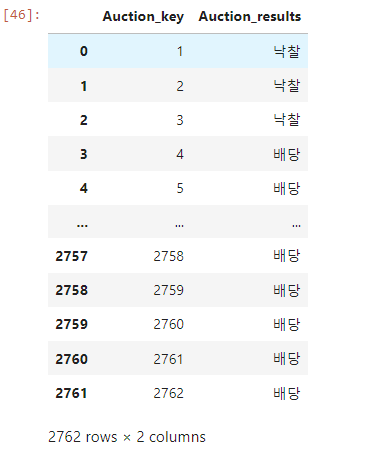

In [ ]:
result.head(43) #데이터결합방향보기. Auction_key 는 경매이름 같은 느낌

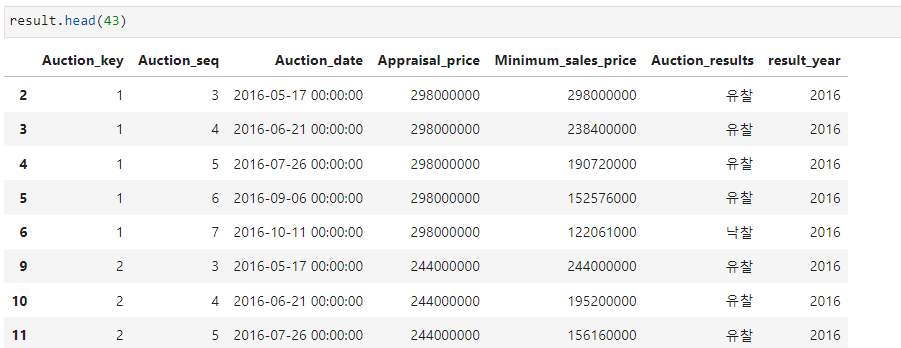

### Appraisal_price(감정가) 최솟값 결합¶

In [ ]:
appraisal_min = result.groupby('Auction_key')['Appraisal_price'].min()
need_merge['appraisal_min'] = appraisal_min
need_merge.head()

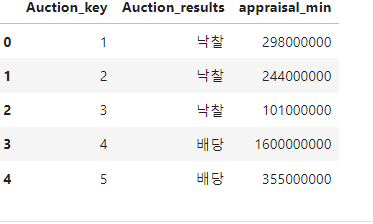

최솟값이 궁금하니 Auction_key 같은 것에서 최소값

### Minimum_sales_price(최저매각가격)의 최솟값 결합 , 낙찰가격 등 정보

In [ ]:
sales_min = result.groupby('Auction_key')['Minimum_sales_price'].min()
need_merge['sales_min'] = sales_min.values
need_merge.head(10)

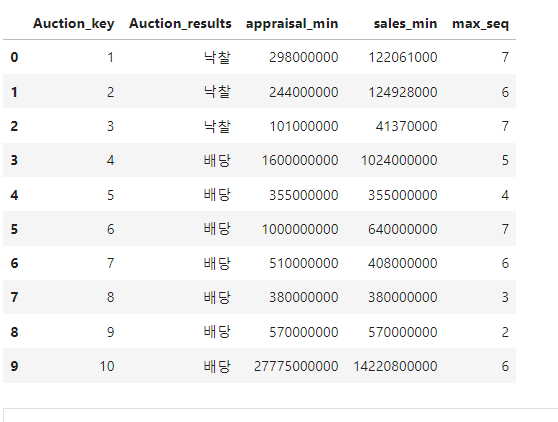

# Auction_seq(경매횟수)의 최댓값 결합

In [ ]:
max_seq = result.groupby('Auction_key')['Auction_seq'].max()
need_merge['max_seq'] = max_seq.values
need_merge.head(2)

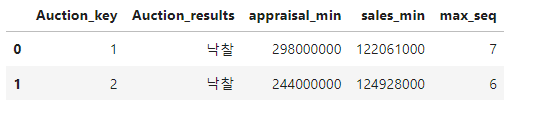

# Auction_results(경매결과)가 유찰인 횟수 결합

In [ ]:
failed_auction = result[result['Auction_results'] == '유찰']
auction_count = failed_auction.groupby('Auction_key')['Auction_results'].count()
auction_result = need_merge.join(auction_count, on = 'Auction_key', how = 'left', lsuffix = '_left', rsuffix = '_right')
auction_result.head(5)

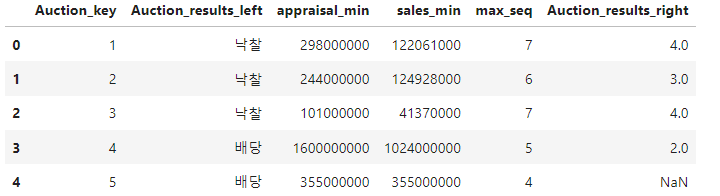

## Auction_results_right 결측치 채우기

In [ ]:
auction_result = auction_result.fillna(0)
auction_result['Auction_results_right'].isnull().sum()

## 증감률 피처 만들기

In [ ]:
last_price = result.groupby('Auction_key')['Minimum_sales_price'].min().values
first_price = result.groupby('Auction_key')['Minimum_sales_price'].max().values

change_rate = (last_price - first_price) / first_price * 100  
auction_result['change_rate'] = change_rate  
auction_result.head(2)

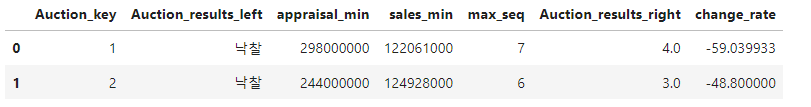

In [ ]:
데이터 결합 - train데이터프레임에 auction_result 결합하여 위의 피처들 모두 적

In [ ]:
train_result = train.merge(auction_result, on = 'Auction_key', how = 'left')
train_result.head(2)

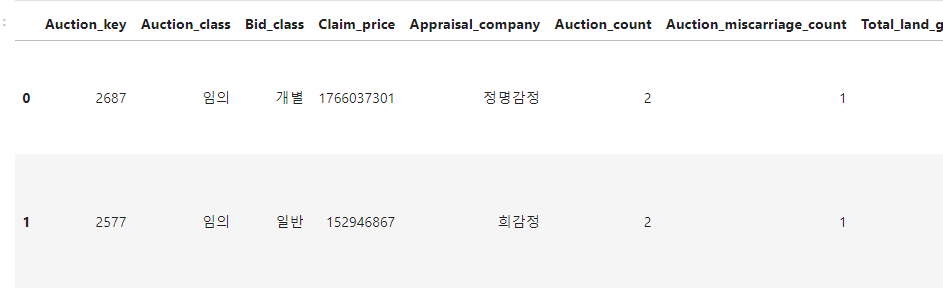

# 유찰횟수(Auction_results_right)별 낙찰가 추이

In [ ]:
import matplotlib.pyplot as plt

pivot = train_result.pivot_table(index = 'year', columns = 'Auction_results_right', values = 'Hammer_price',  aggfunc = 'sum')
pivot.plot(figsize = (8,6))
plt.show()

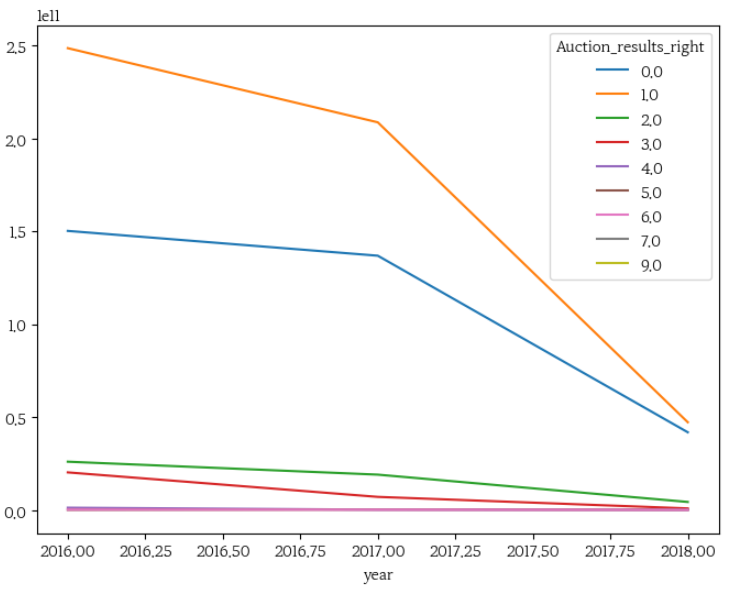

0에서 1만 올랐고 나머지는 유찰되니 가격이 떨 어진다

In [ ]:
objects = ['Auction_class', 'Bid_class', 'Appraisal_company', 'Final_result', 'Creditor', 'addr_do', 'addr_si', 'addr_dong', 'addr_san', 'addr_etc', 'Apartment_usage', 'Share_auction_YorN', 'road_name', 'Close_result', 'Auction_results_left']

for col in objects:
    print(train_result[col].value_counts()[:3])
    print(len(train_result[col].value_counts()))
    print('--------------------------')

In [ ]:
check_company = train_result['Appraisal_company'].str[:-2][:50]
print(check_company)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,9) ,dpi = 100, constrained_layout=True)
addr_index = train_result.groupby('addr_si')['Hammer_price'].mean().sort_values().index
addr_value = train_result.groupby('addr_si')['Hammer_price'].mean().sort_values().values

plt.xlabel('Hammer_price')
plt.ylabel('addr_si')
plt.barh(y = addr_index, width = addr_value)
plt.show()

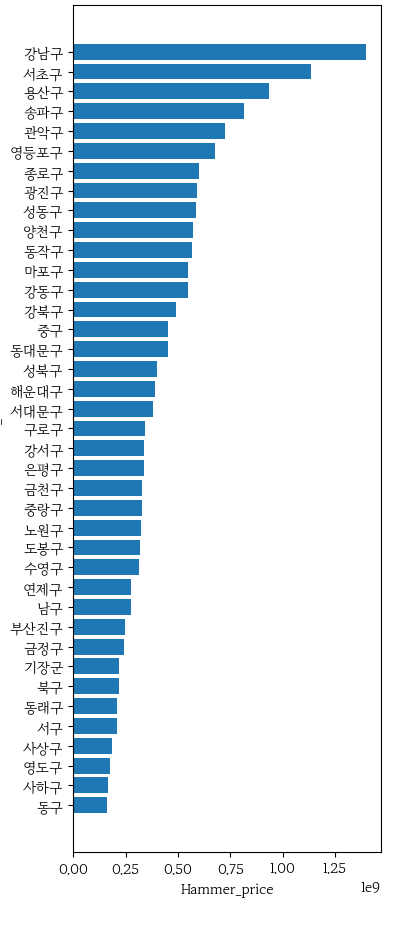

# 시군구별 피처 엔지니어링

In [ ]:
high_landprice = train_result.groupby('addr_si')['Hammer_price'].mean().sort_values(ascending = False).index[:6]

train_result['low_high'] = train_result['addr_si'].apply(lambda x : 1 if x in high_landprice else 0)
train_result['low_high'].value_counts()

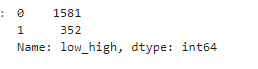

# 원핫인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
onehot_bid = ohe.fit_transform(train_result[['Bid_class']])
onehot_frame = pd.DataFrame(onehot_bid, columns = ohe.categories_[0])
train_result = pd.concat([train_result, onehot_frame], axis = 1)

train_result = train_result.drop(['Bid_class', '일괄'], axis = 1)
train_result.head(2)

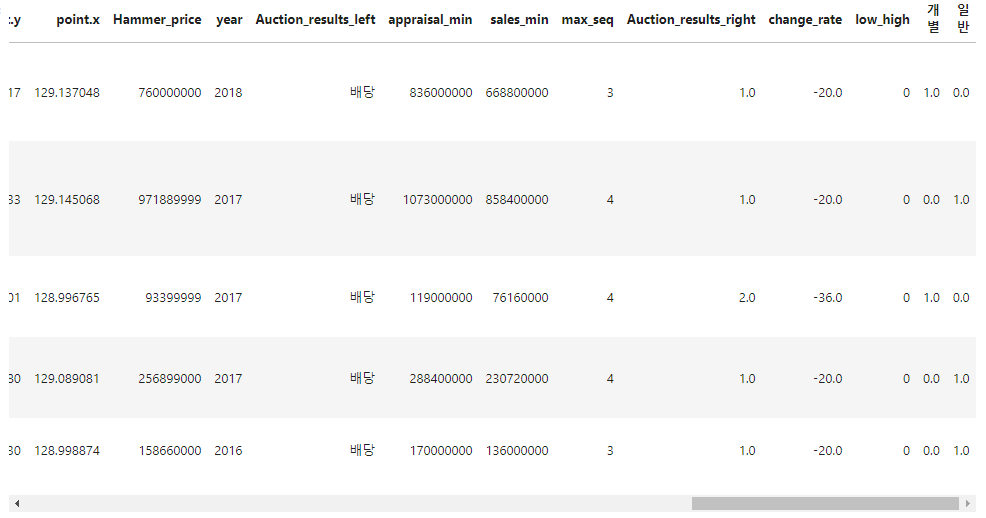

# 두 가지 이상 항목에 라벨 인코딩

In [ ]:
#카테고리변수를 없애기 위해 진행
from sklearn.preprocessing import LabelEncoder

label_col = ['Auction_class', 'addr_do', 'addr_san', 'Share_auction_YorN', 'Auction_results_left', 'Apartment_usage']

for i in label_col:
    le = LabelEncoder()
    train_result[i] = le.fit_transform(train_result[i])

In [5]:
# 피처 제거

In [ ]:
drop_list = ['Close_result', 'Final_result', 'addr_dong', 'addr_etc', 'road_name', 'Appraisal_company', 'Creditor', 'addr_si']

train_result = train_result.drop(drop_list, axis = 1)

----

# 회귀 분석 결과 이해

<br>

## `EDA과정` 다시 쓰기

In [ ]:
# year 피처 생성 및 날짜 피처 제거
train['Final_auction_date'] = pd.to_datetime(train['Final_auction_date'], errors = 'ignore')
train['year'] = train['Final_auction_date'].dt.year
date_col = ['Appraisal_date', 'First_auction_date', 'Final_auction_date', 'Preserve_regist_date', 'Close_date']
train = train.drop(date_col, axis= 1)

# 최빈값으로 결측값 보완
addr_freq = train['addr_bunji1'].value_counts().index[0]
road_freq = train['road_bunji1'].value_counts().index[0]
train['addr_bunji1'] = train['addr_bunji1'].fillna(addr_freq)
train['road_bunji1'] = train['road_bunji1'].fillna(road_freq)

# 결측값 많은 피처 제거
much_null = ['addr_li', 'addr_bunji2', 'Specific', 'road_bunji2']
train = train.drop(much_null, axis = 1)

# Hammer_price를 제외하고 상관계수가 높았던 피처 제거
highcorr_col = ['Total_land_real_area', 'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area']
train = train.drop(highcorr_col, axis =1)

# 데이터 분석 과정에서 제거하기로 결정한 피처 제거
drop_list = ['Close_result', 'Final_result', 'addr_dong', 'addr_etc', 'road_name', 'Appraisal_company', 'Creditor', 'addr_si']
train = train.drop(drop_list, axis = 1)

In [ ]:
# result_year 변수 생성 및 2014년 이후 데이터만 사용
result['result_year'] = pd.to_datetime(result['Auction_date'], errors = 'ignore').dt.year
result = result[result['result_year'] >= 2014]

# 마지막 데이터 추출
need_merge = result[['Auction_key', 'Auction_results']].drop_duplicates(subset = 'Auction_key', keep = 'last')
need_merge = need_merge.reset_index(drop = True)

# 감정가 최솟값 결합
appraisal_min = result.groupby('Auction_key')['Appraisal_price'].min()
need_merge['appraisal_min'] = appraisal_min.values

# 최저매각가격 최솟값 결합
sales_min = result.groupby('Auction_key')['Minimum_sales_price'].min()
need_merge['sales_min'] = sales_min.values

# 경매횟수의 최대값 가져오기
max_seq = result.groupby('Auction_key')['Auction_seq'].max()
need_merge['max_seq'] = max_seq.values

# 경매결과가 유찰인 횟수 가져오기
failed_auction = result[result['Auction_results'] == '유찰']
auction_count = failed_auction.groupby('Auction_key')['Auction_results'].count()
auction_result = need_merge.join(auction_count, on = 'Auction_key', how = 'left', lsuffix = '_left', rsuffix = '_right')

# auction_results_right 결측치 보완
null_indice = auction_result[auction_result['Auction_results_right'].isnull()].index
auction_result.loc[null_indice, 'Auction_results_right'] = 0

# 증감률 피처 생성
last_price = result.groupby('Auction_key')['Minimum_sales_price'].min().values
first_price = result.groupby('Auction_key')['Minimum_sales_price'].max().values
auction_result['change_rate'] = (last_price - first_price) / first_price * 100

# 데이터 결합
train_result = train.merge(auction_result, on = 'Auction_key', how = 'left')
train_result.head(2)

### 원핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False) 
# 이건 Matrix 로 반환하지 말라는 의미로 원핫인코딩은 array를 원하므로 False
#원핫인코딩은 벡터를 허용하지않아 보통 Matrix로 변환이 필요하여 sparse_output=True 가 기본값이다.

onehot_bid = ohe.fit_transform(train_result[['Bid_class']]) #fit 으로 범주를 찾고 transform 으로 바로 변환시킨다.
onehot_frame = pd.DataFrame(onehot_bid, columns = ohe.categories_[0])
train_result = pd.concat([train_result, onehot_frame], axis = 1)

train_result = train_result.drop(['Bid_class', '일괄'], axis = 1) #개별,일괄,일반에 대한 onehot_frame 으로 나타나져있어서 제거필요 , 일반은 0만 존재중
train_result.head(2)

### 라벨 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_col = ['Auction_class', 'addr_do', 'addr_san', 'Share_auction_YorN', 'Auction_results_left', 'Apartment_usage']

for label in label_col:
    le = LabelEncoder()
    train_result[label] = le.fit_transform(train_result[label])

In [ ]:
from sklearn.model_selection import train_test_split

train_x = train_result.drop(['Hammer_price', 'Auction_key'], axis = 1)
train_y = train_result['Hammer_price']

x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

In [ ]:
# 메모리 관리 Gabage Collection 
import gc

del need_merge
del auction_result
del train_result

gc.collect()

단순 회귀 모델 학습 및 검증점수 확인하기

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

ols = sm.OLS(y_train, x_train)
results = ols.fit()
valid_pred = results.predict(x_valid)

mean_squared_error(y_valid, valid_pred, squared = False)

118622724.18304507

In [ ]:
# 단순회귀분석 결과
results.summary()

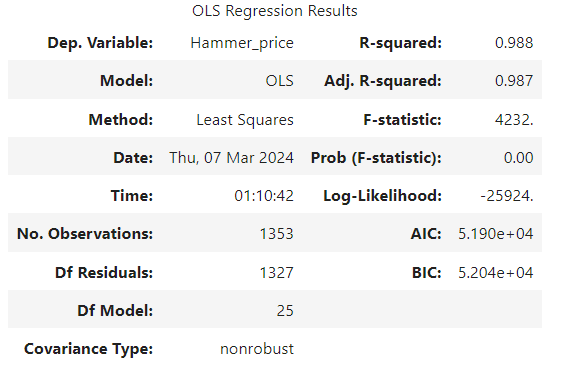

결정계수 0.98 , F통계량 4232 , 모델 OLS(잔차제곱합)등 .., 유효정보가 매우많다.  

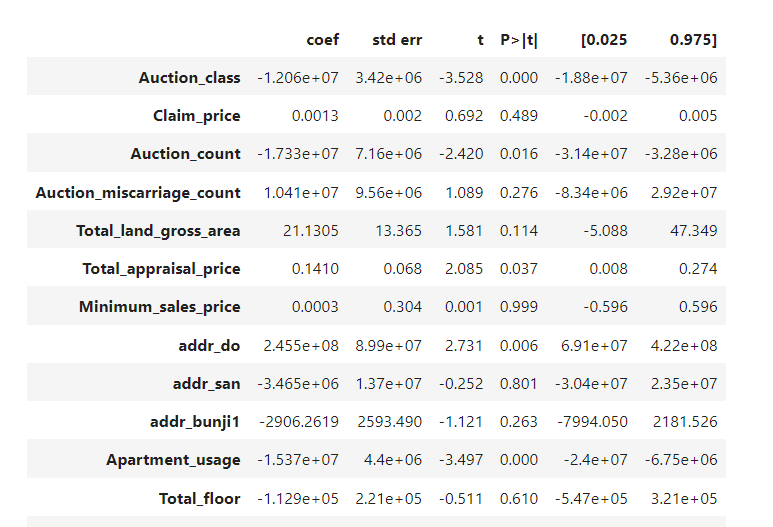

각자행에 대한 회귀분석도 진행되어있다.

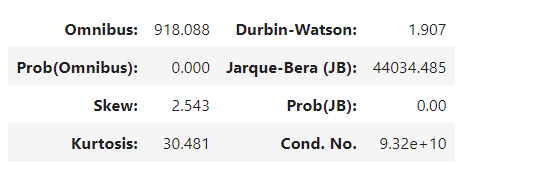

통계학적으로 유용한 정보들이 많이있다. 이중 듀빈왓슨 테스트에 대해서 알고 있다.

```
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
```

노트를 주의깊게 읽어보시면 다중공산성문제가 있을 가능성이 매우 많다고한다. 해결해보자.